# Parabolic PDE's

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.animation as ani

In [4]:
L = 5
B = 3
N = 500
x = np.linspace(0, L, N)
dx = x[1] - x[0]
dt = dx**2/4
y = np.where((x <= L/2), 1., 0.)
D = np.zeros([10*N,N],np.float)
D[0:] = y

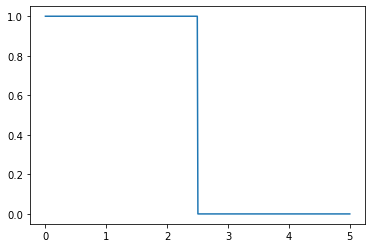

In [5]:
plt.plot(x, y)

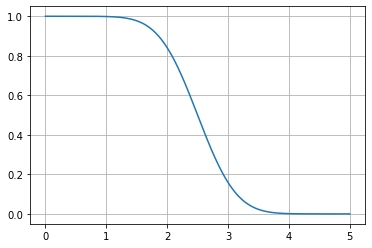

In [20]:
for i in range(1,10*N-1):
    for j in range(1,N-1):
        D[i+1, j] = D[i, j] + dt/dx**2*(D[i, j+1] - 2*D[i, j] + D[i, j-1])
    D[i+1, 0] = D[i, 0] + dt/dx**2*(D[i, 1] - 2*D[i, 0] + D[i, 1])
    D[i+1, N-1] = D[i, N-1] + dt/dx**2*(D[i, N-2] - 2*D[i, N-1] + D[i, N-2])
      
plt.plot(x, D[i+1])
plt.grid()

In [21]:
t = 0

def fa_vec(x):
    
    return np.where((x <= L/2), 1., 0.)

def basis(x, n, t):
    k = n*np.pi/L
    if n == 0:
        return np.sqrt(1/L)*np.ones(len(x))
    else:
        base = np.sqrt(2/L)*np.cos(k*x) * np.exp(-(k**2)*t)
        return base

         n	      coef
       ---	     -----
         0	   1.11579
         1	   1.00447
         2	  -0.00106
         3	  -0.33765
         4	  -0.00317
         5	   0.19921
         6	  -0.00106
         7	  -0.14592
         8	  -0.00317
         9	   0.10975
        10	  -0.00106
        11	  -0.09364
        12	  -0.00317
        13	   0.07534
        14	  -0.00106
        15	  -0.06924
        16	  -0.00317
        17	   0.05713
        18	  -0.00105
        19	  -0.05512
        20	  -0.00317
        21	   0.04586
        22	  -0.00105
        23	  -0.04592
        24	  -0.00317
        25	   0.03819
        26	  -0.00105
        27	  -0.03944
        28	  -0.00317
        29	   0.03265
        30	  -0.00105
        31	  -0.03463
        32	  -0.00317
        33	   0.02845
        34	  -0.00105
        35	  -0.03093
        36	  -0.00318
        37	   0.02515
        38	  -0.00105
        39	  -0.02799
        40	  -0.00318
        41	   0.02251
        42	  -0.00105
        43

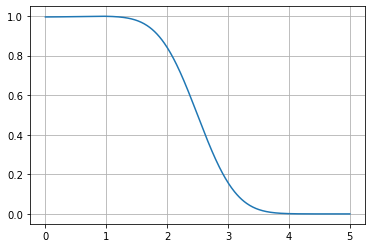

In [22]:
def simpson_array(f, h):
    """

Use Simpson's Rule to estimate an integral of an array of
    function samples
    
    f: function samples (already in an array format)
    h: spacing in "x" between sample points
    
    The array is assumed to have an even number of elements.
    
    """
    if len(f)%2 != 0:
        raise ValueError("Sorry, f must be an array with an even number of elements.")
        
    evens =  f[2:-2:2]
    odds = f[1:-1:2]
    return (f[0] + f[-1] + 2*odds.sum() + 4*evens.sum())*dx/3.0

def braket(n,t):
    """
    Evaluate <n|f>
    """
    return simpson_array(basis(x,n,t)*fa_vec(x),dx)


M=100
coefs = []

for n in range(M):
    coefs.append(braket(n,0))   # do numerical integral

sup = np.zeros(N)

def Superposition(t):
    sup = np.zeros(N)
    for n in range(M):
        sup += coefs[n]*basis(x,n, t)
    return sup

T = 0.125

plt.plot(x,Superposition(T))
plt.grid()
print("%10s\t%10s" % ('n', 'coef'))
print("%10s\t%10s" % ('---','-----'))
for n in range(M):
    print("%10d\t%10.5f" % (n, coefs[n]))

In [23]:
np.sqrt(((D[i+1] - Superposition(T))**2).sum()/len(x))

0.0017028881160125735